Widmark's formula

In [ ]:
def calculate_bac(gender, weight_lbs, alcohol_oz, hours_since_drinking=0):
    if gender.lower() == 'male':
        r = 0.68
    elif gender.lower() == 'female':
        r = 0.55
    else:
        raise ValueError("Invalid gender. Use 'male' or 'female'.")

    bac = (alcohol_oz * 5.14) / (weight_lbs * r) - 0.015 * hours_since_drinking
    bac = max(bac, 0)
    bac = round(bac, 4)
    print(f"Calculated BAC: {bac}")
    return bac


https://my.clevelandclinic.org/health/diagnostics/22689-blood-alcohol-content-bac

Classification Function

In [ ]:
def classify_bac(bac):
    if bac < 0.02:
        msg = "Sober: No alcohol in your blood."
    elif bac < 0.05:
        msg = "Tipsy: Altered mood, relaxation, slight loss of judgment."
    elif bac < 0.08:
        msg = "Buzzed: Uninhibited, lowered alertness, impaired judgment."
    elif bac < 0.10:
        msg = "Legally Impaired: Reduced coordination, impaired judgment and reasoning."
    elif bac < 0.15:
        msg = "Drunk: Reduced reaction time, slurred speech, slowed thinking."
    elif bac < 0.30:
        msg = "Very Drunk: Altered mood, nausea, vomiting, loss of balance and muscle control."
    elif bac < 0.40:
        msg = "Severe Alcohol Poisoning: Alcohol poisoning, loss of consciousness."
    else:
        msg = "Fatal Risk: Potentially fatal, risk of coma and death."

    print(f"Classification: {msg}")


The 80/20 split prediction model and full dataset prediction model for the Ohio Dataset


Evaluation on Test Set (80/20 split):
Mean Squared Error: 0.0001
R2 Score: 0.9472
Coefficients: [ 0.00217017 -0.00217017 -0.00034017  0.02057164]
Intercept: 0.0315


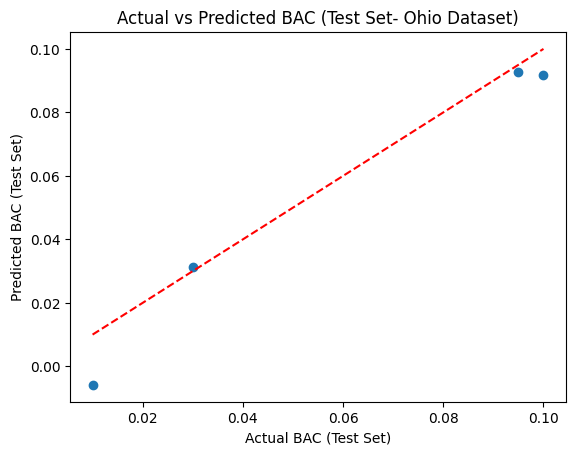


Evaluation on Full Dataset:
Mean Squared Error: 0.0001
R2 Score: 0.9528
Coefficients: [ 0.00162015 -0.00162015 -0.0003444   0.01989596]
Intercept: 0.0371


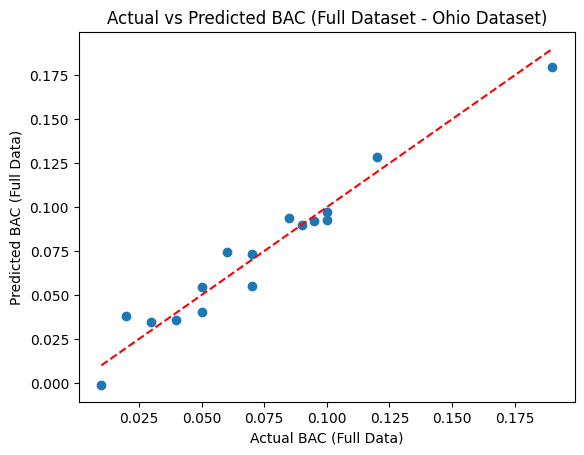

(LinearRegression(), LinearRegression())

In [ ]:
def analyze_csv(file_path, features, target_column_name):
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.model_selection import train_test_split

    dataset = pd.read_csv(file_path)
    X = dataset[features]
    Y = dataset[target_column_name]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)

    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    print(f"\nEvaluation on Test Set (80/20 split):")
    print(f"Mean Squared Error: {mse_test:.4f}")
    print(f"R2 Score: {r2_test:.4f}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_:.4f}")

    plt.scatter(y_test, y_pred_test)
    plt.xlabel('Actual BAC (Test Set)')
    plt.ylabel('Predicted BAC (Test Set)')
    plt.title('Actual vs Predicted BAC (Test Set- Ohio Dataset)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()

    full_model = LinearRegression()
    full_model.fit(X, Y)
    y_pred_full = full_model.predict(X)

    mse_full = mean_squared_error(Y, y_pred_full)
    r2_full = r2_score(Y, y_pred_full)
    print(f"\nEvaluation on Full Dataset:")
    print(f"Mean Squared Error: {mse_full:.4f}")
    print(f"R2 Score: {r2_full:.4f}")
    print(f"Coefficients: {full_model.coef_}")
    print(f"Intercept: {full_model.intercept_:.4f}")


    plt.scatter(Y, y_pred_full)
    plt.xlabel('Actual BAC (Full Data)')
    plt.ylabel('Predicted BAC (Full Data)')
    plt.title('Actual vs Predicted BAC (Full Dataset - Ohio Dataset)')
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')
    plt.show()

    return model, full_model

analyze_csv('/content/ohio_bac_dataset_processed.csv', ['Female', 'Male', 'Weight', 'Beers'], 'BAC')


The 80/20 split prediction model and full dataset prediction model for the Austraiian Dataset


Test Set Evaluation (80/20 split):
MSE: 0.0004
R2: 0.0914
Coefficients: [-2.79853504e-03 -2.28829343e-06  1.48092143e-03  2.80032252e-04]
Intercept: 0.0602


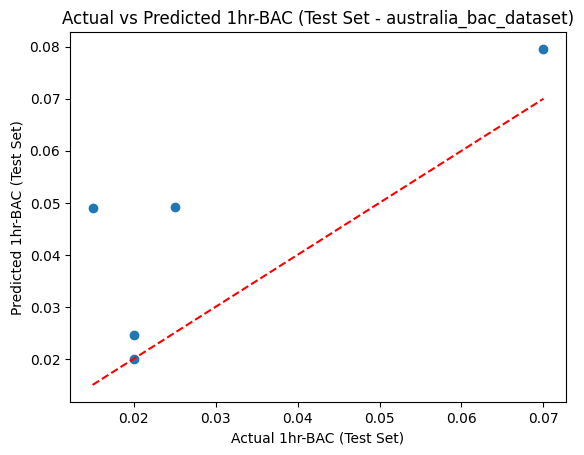


Full Dataset Evaluation:
MSE: 0.0004
R2: 0.6215
Coefficients: [-1.63539351e-04 -2.11506424e-06  1.52501968e-03  4.43955847e-04]
Intercept: 0.0423


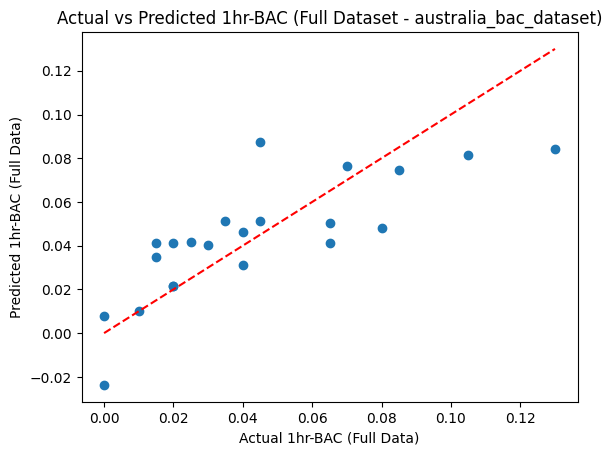

(LinearRegression(), LinearRegression())

In [ ]:
def analyze_australia_bac(file_path):
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.model_selection import train_test_split

    # Load CSV
    dataset = pd.read_csv(file_path)
    features = ['Gender_male', 'Bodyweight_grams', 'Ethanol_grams', 'Age']
    target_column = '1hr-BAC'
    X = dataset[features]
    Y = dataset[target_column]

    # 80/20 split for evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)

    # Evaluation on test set
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    print(f"\nTest Set Evaluation (80/20 split):")
    print(f"MSE: {mse_test:.4f}")
    print(f"R2: {r2_test:.4f}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_:.4f}")

    # Plot test set
    plt.scatter(y_test, y_pred_test)
    plt.xlabel('Actual 1hr-BAC (Test Set)')
    plt.ylabel('Predicted 1hr-BAC (Test Set)')
    plt.title('Actual vs Predicted 1hr-BAC (Test Set - australia_bac_dataset)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()

    # Full dataset training
    full_model = LinearRegression()
    full_model.fit(X, Y)
    y_pred_full = full_model.predict(X)

    # Evaluation on full dataset
    mse_full = mean_squared_error(Y, y_pred_full)
    r2_full = r2_score(Y, y_pred_full)
    print(f"\nFull Dataset Evaluation:")
    print(f"MSE: {mse_full:.4f}")
    print(f"R2: {r2_full:.4f}")
    print(f"Coefficients: {full_model.coef_}")
    print(f"Intercept: {full_model.intercept_:.4f}")

    # Plot full dataset
    plt.scatter(Y, y_pred_full)
    plt.xlabel('Actual 1hr-BAC (Full Data)')
    plt.ylabel('Predicted 1hr-BAC (Full Data)')
    plt.title('Actual vs Predicted 1hr-BAC (Full Dataset - australia_bac_dataset)')
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')
    plt.show()

    return model, full_model
analyze_australia_bac('/content/australia_bac_dataset_processed.csv')

Making 10000 different models for each, then creating a distrubtion on how well the model is based on the r-squared value

We can see the ohio dataset is consistently better, so we choose to use this dataset and it's predicted model.


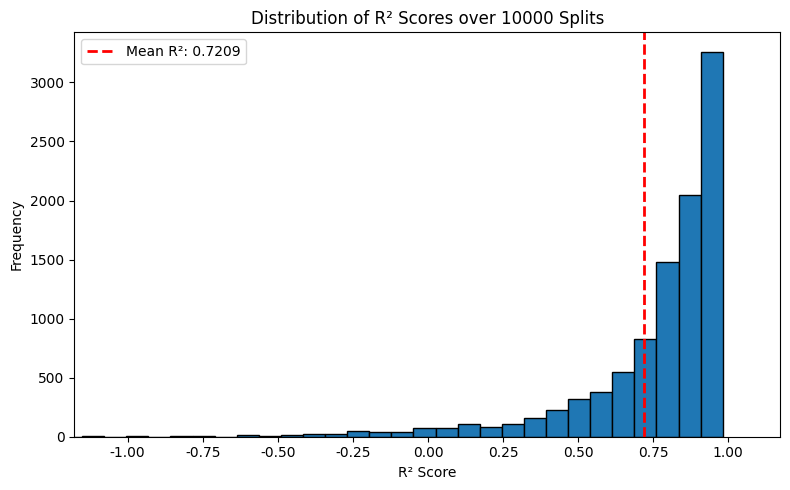

Mean R²: 0.7209
Standard Deviation of R²: 0.5036


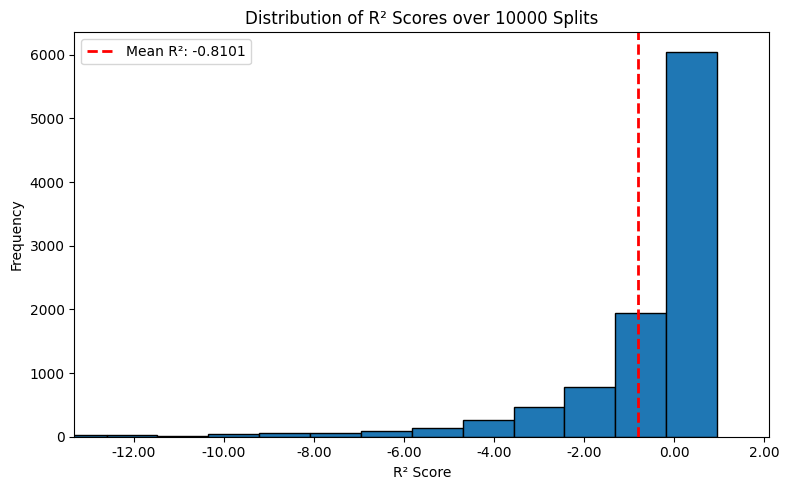

Mean R²: -0.8101
Standard Deviation of R²: 3.1842


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

def rsquared_distribution(file_path, features, target_column_name, iterations=10000):
    dataset = pd.read_csv(file_path)
    X = dataset[features]
    Y = dataset[target_column_name]

    r2_scores = []

    for _ in range(iterations):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

    r2_scores = np.array(r2_scores)
    mean_r2 = np.mean(r2_scores)
    std_r2 = np.std(r2_scores)

    lower_bound = np.percentile(r2_scores, 1)
    upper_bound = np.percentile(r2_scores, 99)
    range_padding = (upper_bound - lower_bound) * 0.1

    # Plot
    plt.figure(figsize=(8,5))
    num_bins = min(100, int(np.sqrt(iterations)))
    plt.hist(r2_scores, bins=num_bins, edgecolor='black')
    plt.xlabel('R² Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of R² Scores over {iterations} Splits')

    plt.axvline(mean_r2, color='red', linestyle='dashed', linewidth=2, label=f'Mean R²: {mean_r2:.4f}')
    plt.legend()

    plt.xlim(lower_bound - range_padding, upper_bound + range_padding)

    plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    plt.tight_layout()
    plt.show()

    print(f"Mean R²: {mean_r2:.4f}")
    print(f"Standard Deviation of R²: {std_r2:.4f}")

# Example usage
rsquared_distribution('/content/ohio_bac_dataset_processed.csv',
                      features=['Female', 'Male', 'Weight', 'Beers'],
                      target_column_name='BAC', iterations=10000)

rsquared_distribution('/content/australia_bac_dataset_processed.csv',
                      features=['Gender_male', 'Bodyweight_grams', 'Ethanol_grams', 'Age'],
                      target_column_name='1hr-BAC', iterations=10000)


Takes in user input, and uses it on the actual formula and our model, and shows it results


In [ ]:
def compare_model_and_widmark_with_plot(model):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np

    gender_input = input("Enter gender (Male/Female): ").strip().lower()
    if gender_input == 'male':
        female, male, r = 0, 1, 0.68
    elif gender_input == 'female':
        female, male, r = 1, 0, 0.55
    else:
        print("Invalid gender input.")
        return

    try:
        weight = float(input("Enter weight (lbs): "))
        beers = int(input("Enter number of beers consumed: "))
    except ValueError:
        print("Invalid input for weight or beers.")
        return

    beer_range = np.arange(0, 15, 1)
    model_bac_list = []
    widmark_bac_list = []

    for b in beer_range:
        individual_features = pd.DataFrame([[female, male, weight, b]], columns=['Female', 'Male', 'Weight', 'Beers'])
        model_bac_list.append(model.predict(individual_features)[0])
        alcohol_oz = b * 12 * 0.05
        widmark_bac_list.append((alcohol_oz * 5.14) / (weight * r))

    individual_features_user = pd.DataFrame([[female, male, weight, beers]], columns=['Female', 'Male', 'Weight', 'Beers'])
    user_model_bac = model.predict(individual_features_user)[0]
    user_alcohol_oz = beers * 12 * 0.05
    user_widmark_bac = (user_alcohol_oz * 5.14) / (weight * r)

    plt.plot(beer_range, model_bac_list, 'g-', label='Model Predicted BAC')
    plt.plot(beer_range, widmark_bac_list, 'r--', label='Widmark BAC')
    plt.scatter([beers], [user_model_bac], color='green', label='User Point (Model)', zorder=5)
    plt.scatter([beers], [user_widmark_bac], color='red', label='User Point (Widmark)', zorder=5)
    plt.xlabel('Number of Beers')
    plt.ylabel('BAC Level')
    plt.title('Ohio Dataset 80/20 split Model vs Widmark BAC across Beers')
    plt.legend()
    plt.show()

    print(f"\nModel Predicted BAC for {beers} beers: {user_model_bac:.4f}")
    classify_bac(user_model_bac)
    print(f"\nWidmark Calculated BAC for {beers} beers: {user_widmark_bac:.4f}")
    classify_bac(user_widmark_bac)



Evaluation on Test Set (80/20 split):
Mean Squared Error: 0.0001
R2 Score: 0.9472
Coefficients: [ 0.00217017 -0.00217017 -0.00034017  0.02057164]
Intercept: 0.0315


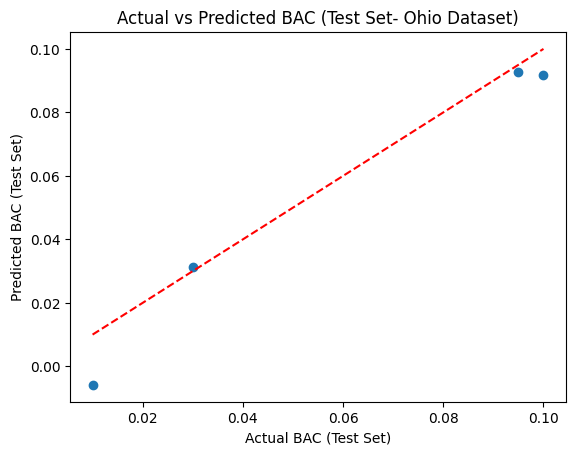


Evaluation on Full Dataset:
Mean Squared Error: 0.0001
R2 Score: 0.9528
Coefficients: [ 0.00162015 -0.00162015 -0.0003444   0.01989596]
Intercept: 0.0371


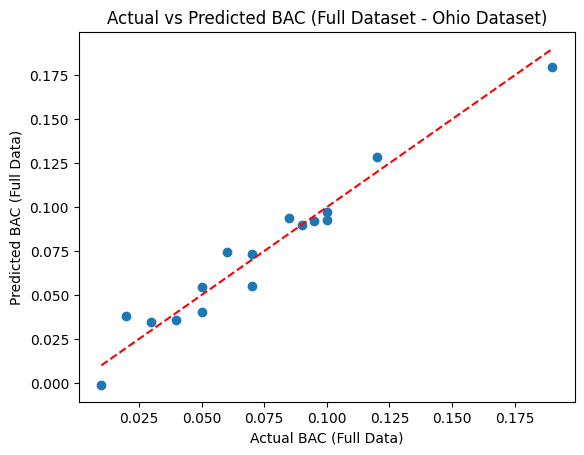

Enter gender (Male/Female): male
Enter weight (lbs): 150
Enter number of beers consumed: 5


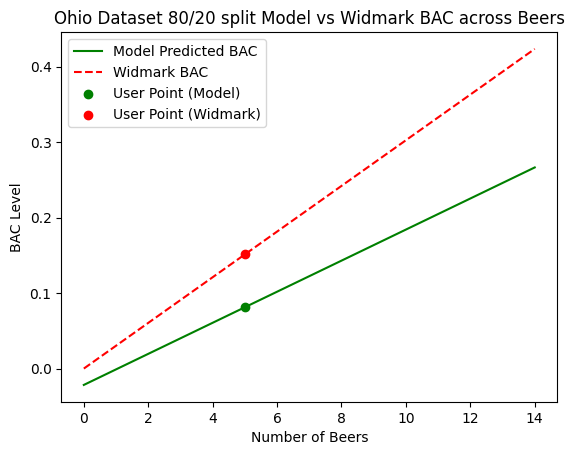


Model Predicted BAC for 5 beers: 0.0812
Classification: Legally Impaired: Reduced coordination, impaired judgment and reasoning.

Widmark Calculated BAC for 5 beers: 0.1512
Classification: Very Drunk: Altered mood, nausea, vomiting, loss of balance and muscle control.


In [ ]:
trained_model, full_model = analyze_csv('/content/ohio_bac_dataset_processed.csv', ['Female', 'Male', 'Weight', 'Beers'], 'BAC')
compare_model_and_widmark_with_plot(trained_model)
